# Amazon reviews sentiment analysis

## Libraries import 

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Data exploration

In [20]:
#load the data
df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [21]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

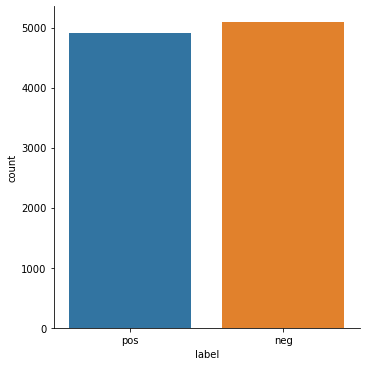

In [37]:
sns.catplot(x="label", kind="count", data=df)

We can see that the dataset is slightly unbalanced.

## Data cleaning

In [40]:
# check for missing values
df.isna().sum()

label     0
review    0
dtype: int64

In [41]:
# check for empty strings
blanks = []  # start with an empty list
for i,lb,rv in df.itertuples():  # iterate over the DataFrame
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
sum(blanks)

0

As we can notice, we are a dataset ready to be used.

## Sentiment analysis using VADER

In [45]:
# Lets look at that review
df.loc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [43]:
# Take a first glance at the first review using VADER 
sid.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [44]:
df.loc[0]['label']

'pos'

VADER gives a quite good result as we can see from the positive compound.

In [46]:
# Add new columns to the dataset
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [47]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [48]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


### Accuracy report

In [50]:
accuracy_score(df['label'],df['comp_score'])

0.7091

In [51]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [52]:
print(confusion_matrix(df['label'],df['comp_score']))

[[2622 2475]
 [ 434 4469]]


The accuracy result tells us that VADER correctly classify the reviews as "positive" or "negative" 71% of the time. 
That is a very descent result if we take into consideration the fact that some reviews might have figure of speech. 
Actually, one of the challenges of NLP is to account for implicit meaning such as sarcasm.